In [1]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler     # standard scaler


# loading data
df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

In [4]:
# # pulling up data dictionary
# df_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

# # displaying the data dictionary
# df_description

In [5]:
# REVENUE                                   
# CROSS_SELL_SUCCESS                        target
# NAME
# EMAIL                                     compute, dummy and drop
# FIRST_NAME                                drop
# FAMILY_NAME                               drop
# TOTAL_MEALS_ORDERED                       大约分类出两种客户，每月大约 11，和，每季度买，一年 15 次
#                                           计算每周次数，填入打折信息，dummy
# UNIQUE_MEALS_PURCH                        
# CONTACTS_W_CUSTOMER_SERVICE               
# PRODUCT_CATEGORIES_VIEWED
# AVG_TIME_PER_SITE_VISIT
# MOBILE_NUMBER                             compute,(new customers, existing customers),dummy,and drop
# CANCELLATIONS_BEFORE_NOON
# CANCELLATIONS_AFTER_NOON
# TASTES_AND_PREFERENCES                    split new customs and exist customes，dummy()
# MOBILE_LOGINS
# PC_LOGINS
# WEEKLY_PLAN                               计算 discount 分类信息，dummy，and drop
# EARLY_DELIVERIES
# LATE_DELIVERIES
# PACKAGE_LOCKER
# REFRIGERATED_LOCKER
# FOLLOWED_RECOMMENDATIONS_PCT              ？不知是否需要分出来 best sell and recommend
# AVG_PREP_VID_TIME
# LARGEST_ORDER_SIZE
# MASTER_CLASSES_ATTENDED
# MEDIAN_MEAL_RATING
# AVG_CLICKS_PER_VISIT
# TOTAL_PHOTOS_VIEWED


In [6]:
# dropping post-event horizon features
# checking results
df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [7]:
# imputing email

# process emails
# placeholder list
placeholder_lst = []

email_set_professional = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
email_set_personal = ['@gmail.com','@yahoo.com','@protonmail.com']
email_set_junk = ['@me.com','@aol.com','@hotmail.com','@live.com @msn.com','@passport.com']

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    if('@'+split_email[1] in email_set_professional):
        placeholder_lst.append('PREFESSIONAL')
    elif('@'+split_email[1] in email_set_personal):
        placeholder_lst.append('PERSONAL')
    elif('@'+split_email[1] in email_set_junk):
        placeholder_lst.append('JUNK')
    else:
        placeholder_lst.append('UNKNOWN')

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# one hot email
one_hot_email = pd.get_dummies(email_df,prefix='EMAIL',prefix_sep='_')

# joining codings together
df = df.join(one_hot_email)

# drop EMAIL
df = df.drop('EMAIL',axis = 1)

# check result 
df.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN
0,393.0,1,Saathos,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,0,0,1,0
1,1365.0,1,Alysanne Osgrey,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,0,0,1,0
2,800.0,1,Edwyd Fossoway,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1,0
3,600.0,1,Eleyna Westerling,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,0,0,1,0
4,1490.0,1,Elyn Norridge,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,0,0,1,0


In [8]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [9]:
# drop NAME,FIRST_NAME,FAMILY_NAME

df = df.drop(['NAME','FIRST_NAME','FAMILY_NAME'],axis = 1)
df.columns
             

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_JUNK', 'EMAIL_PERSONAL', 'EMAIL_PREFESSIONAL', 'EMAIL_UNKNOWN'], dtype='object')

In [12]:
# avg price

df['AVG_PRICE'] = df['REVENUE']/df['TOTAL_MEALS_ORDERED']



In [13]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [14]:
# TASTES_AND_PREFERENCES
# 根据是否设置口味偏好来判断是否为新用户

# 
df['TASTES_AND_PREFERENCES'][df['TASTES_AND_PREFERENCES'] == 0] ='Existing'
df['TASTES_AND_PREFERENCES'][df['TASTES_AND_PREFERENCES'] == 1] ='New'

# one hot TASTES_AND_PREFERENCES
one_hot_tap = pd.get_dummies(df['TASTES_AND_PREFERENCES'],prefix='Customers',prefix_sep='_')

# joining codings together
df = df.join(one_hot_tap)

# drop EMAIL
df = df.drop('TASTES_AND_PREFERENCES',axis = 1)

# check result 
df.head()


,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,AVG_PRICE,Customers_Existing,Customers_New
0,393.0,1,14,6,12,10,48.00,1,3,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,0,0,1,0,28.071429,0,1
1,1365.0,1,87,3,8,8,40.35,1,0,0,5,1,12,0,2,0,0,84.8,1,0,3,13,170,0,0,1,0,15.689655,0,1
2,800.0,1,15,7,11,5,19.77,1,3,0,6,1,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1,0,53.333333,0,1
3,600.0,1,13,6,11,5,90.00,1,2,0,6,1,14,0,3,0,0,43.8,1,0,2,14,0,0,0,1,0,46.153846,0,1
4,1490.0,1,47,8,6,10,40.38,1,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,0,0,1,0,31.702128,1,0


In [15]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [16]:



# MOBILE_NUMBER
# 判断手机号，区分现有客户及新用户

# 
df['MOBILE_NUMBER'][df['MOBILE_NUMBER'] == 0] ='Existing'
df['MOBILE_NUMBER'][df['MOBILE_NUMBER'] == 1] ='New'

# one hot TASTES_AND_PREFERENCES
one_hot_tap = pd.get_dummies(df['MOBILE_NUMBER'],prefix='Customers_MOBILE',prefix_sep='_')

# joining codings together
df = df.join(one_hot_tap)

# drop EMAIL
df = df.drop('MOBILE_NUMBER',axis = 1)

# check result 
df.head()



,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,AVG_PRICE,Customers_Existing,Customers_New,Customers_MOBILE_Existing,Customers_MOBILE_New
0,393.0,1,14,6,12,10,48.00,3,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,0,0,1,0,28.071429,0,1,0,1
1,1365.0,1,87,3,8,8,40.35,0,0,5,1,12,0,2,0,0,84.8,1,0,3,13,170,0,0,1,0,15.689655,0,1,0,1
2,800.0,1,15,7,11,5,19.77,3,0,6,1,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1,0,53.333333,0,1,0,1
3,600.0,1,13,6,11,5,90.00,2,0,6,1,14,0,3,0,0,43.8,1,0,2,14,0,0,0,1,0,46.153846,0,1,0,1
4,1490.0,1,47,8,6,10,40.38,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,0,0,1,0,31.702128,1,0,0,1


In [17]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [18]:

# WEEKLY_PLAN
# 订餐次数、周数，根据标准划分，并乘以周计划次数

df['WEEKLY_PLAN_DISCOUNT']= 1

for index,col in df.iterrows():
    _ = df.loc[index,'TOTAL_MEALS_ORDERED']//52
    if _ >=5:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 0.8
    elif _ >=3:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 0.9
    else:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 1        

df['WEEKLY_PLAN_DISCOUNT'].head()



one_hot_discounts = pd.get_dummies(df['WEEKLY_PLAN_DISCOUNT'],prefix='WEEKLY_PLAN_DISCOUNT',prefix_sep='_')

# joining codings together
df = df.join(one_hot_discounts)
df = df.drop('WEEKLY_PLAN_DISCOUNT',axis = 1)


# 另外一个比例订餐次数的比例

df['WEEKLY_PLAN_RATE']= df['WEEKLY_PLAN']//52

df = df.drop('WEEKLY_PLAN',axis = 1)



In [19]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [20]:
df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_JUNK', 'EMAIL_PERSONAL', 'EMAIL_PREFESSIONAL', 'EMAIL_UNKNOWN', 'AVG_PRICE', 'Customers_Existing', 'Customers_New', 'Customers_MOBILE_Existing', 'Customers_MOBILE_New', 'WEEKLY_PLAN_DISCOUNT_0.8', 'WEEKLY_PLAN_DISCOUNT_0.9', 'WEEKLY_PLAN_DISCOUNT_1.0', 'WEEKLY_PLAN_RATE'], dtype='object')

In [21]:
for x in df.columns:
    print("df_train['"+x+"']+")

df_train['REVENUE']+
df_train['CROSS_SELL_SUCCESS']+
df_train['TOTAL_MEALS_ORDERED']+
df_train['UNIQUE_MEALS_PURCH']+
df_train['CONTACTS_W_CUSTOMER_SERVICE']+
df_train['PRODUCT_CATEGORIES_VIEWED']+
df_train['AVG_TIME_PER_SITE_VISIT']+
df_train['CANCELLATIONS_BEFORE_NOON']+
df_train['CANCELLATIONS_AFTER_NOON']+
df_train['PC_LOGINS']+
df_train['MOBILE_LOGINS']+
df_train['EARLY_DELIVERIES']+
df_train['LATE_DELIVERIES']+
df_train['PACKAGE_LOCKER']+
df_train['REFRIGERATED_LOCKER']+
df_train['AVG_PREP_VID_TIME']+
df_train['LARGEST_ORDER_SIZE']+
df_train['MASTER_CLASSES_ATTENDED']+
df_train['MEDIAN_MEAL_RATING']+
df_train['AVG_CLICKS_PER_VISIT']+
df_train['TOTAL_PHOTOS_VIEWED']+
df_train['EMAIL_JUNK']+
df_train['EMAIL_PERSONAL']+
df_train['EMAIL_PREFESSIONAL']+
df_train['EMAIL_UNKNOWN']+
df_train['AVG_PRICE']+
df_train['Customers_Existing']+
df_train['Customers_New']+
df_train['Customers_MOBILE_Existing']+
df_train['Customers_MOBILE_New']+
df_train['WEEKLY_PLAN_DISCOUNT_0.8']+
df_train['WEEKL

In [22]:
df.head()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,AVG_PRICE,Customers_Existing,Customers_New,Customers_MOBILE_Existing,Customers_MOBILE_New,WEEKLY_PLAN_DISCOUNT_0.8,WEEKLY_PLAN_DISCOUNT_0.9,WEEKLY_PLAN_DISCOUNT_1.0,WEEKLY_PLAN_RATE
0,393.0,1,14,6,12,10,48.00,3,1,5,2,0,2,0,0,33.4,1,0,1,17,0,0,0,1,0,28.071429,0,1,0,1,0,0,1,0
1,1365.0,1,87,3,8,8,40.35,0,0,5,1,0,2,0,0,84.8,1,0,3,13,170,0,0,1,0,15.689655,0,1,0,1,0,0,1,0
2,800.0,1,15,7,11,5,19.77,3,0,6,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1,0,53.333333,0,1,0,1,0,0,1,0
3,600.0,1,13,6,11,5,90.00,2,0,6,1,0,3,0,0,43.8,1,0,2,14,0,0,0,1,0,46.153846,0,1,0,1,0,0,1,0
4,1490.0,1,47,8,6,10,40.38,0,0,5,1,0,8,0,0,84.8,1,1,3,12,205,0,0,1,0,31.702128,1,0,0,1,0,0,1,0


In [19]:
# ##########################
# 开始进行分析
# ###################

In [24]:
# import packages
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


In [25]:

# declaring explanatory variables
df_data = df.drop('CROSS_SELL_SUCCESS', axis = 1)
# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']



In [26]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 508,
            stratify = df_target)


# merging training data for statsmodels
df_train = pd.concat([X_train, y_train], axis = 1)

In [27]:
# REVENUE+
#                                                                 AVG_PRICE+
#                                                                 TOTAL_MEALS_ORDERED+
#                                                                 UNIQUE_MEALS_PURCH+
#                                                                 CONTACTS_W_CUSTOMER_SERVICE+
#                                                                 PRODUCT_CATEGORIES_VIEWED+
#                                                                 AVG_TIME_PER_SITE_VISIT+
#                                                                 CANCELLATIONS_BEFORE_NOON+
#                                                                 CANCELLATIONS_AFTER_NOON+
#                                                                 MOBILE_LOGINS+
#                                                                 PC_LOGINS+
#                                                                 EARLY_DELIVERIES+
#                                                                 LATE_DELIVERIES+
#                                                                 PACKAGE_LOCKER+
#                                                                 REFRIGERATED_LOCKER+
#                                                                 FOLLOWED_RECOMMENDATIONS_PCT+
#                                                                 AVG_PREP_VID_TIME+
#                                                                 LARGEST_ORDER_SIZE+
#                                                                 MASTER_CLASSES_ATTENDED+
#                                                                 MEDIAN_MEAL_RATING+
#                                                                 AVG_CLICKS_PER_VISIT+
#                                                                 TOTAL_PHOTOS_VIEWED+
#                                                                 EMAIL_JUNK+
#                                                                 EMAIL_PERSONAL+
#                                                                 EMAIL_PREFESSIONAL+
#                                                                 Customers_Existing+
#                                                                 Customers_MOBILE_Existing+
#                                                                 WEEKLY_PLAN_RATE+
#                                                                 df_train['WEEKLY_PLAN_DISCOUNT_0.8']+
#                                                                 df_train['WEEKLY_PLAN_DISCOUNT_0.9']

In [29]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~    REVENUE+
                                                                AVG_PRICE+
                                                                TOTAL_MEALS_ORDERED+
                                                                UNIQUE_MEALS_PURCH+
                                                                CONTACTS_W_CUSTOMER_SERVICE+
                                                                PRODUCT_CATEGORIES_VIEWED+
                                                                AVG_TIME_PER_SITE_VISIT+
                                                                CANCELLATIONS_BEFORE_NOON+
                                                                CANCELLATIONS_AFTER_NOON+
                                                                MOBILE_LOGINS+
                                                                PC_LOGINS+
                                                                EARLY_DELIVERIES+
                                                                LATE_DELIVERIES+
                                                                PACKAGE_LOCKER+
                                                                REFRIGERATED_LOCKER+
                                                                AVG_PREP_VID_TIME+
                                                                LARGEST_ORDER_SIZE+
                                                                MASTER_CLASSES_ATTENDED+
                                                                MEDIAN_MEAL_RATING+
                                                                AVG_CLICKS_PER_VISIT+
                                                                TOTAL_PHOTOS_VIEWED+
                                                                EMAIL_JUNK+
                                                                EMAIL_PERSONAL+
                                                                EMAIL_PREFESSIONAL+
                                                                AVG_PRICE+
                                                                Customers_Existing+
                                                                Customers_MOBILE_Existing+
                                                                WEEKLY_PLAN_RATE+
                                                                df_train['WEEKLY_PLAN_DISCOUNT_0.8']+
                                                                df_train['WEEKLY_PLAN_DISCOUNT_0.9']
""",
                           data    = df_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.553609
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           29
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.1184
Time:                        23:42:08   Log-Likelihood:                -807.72
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.146e-30
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.6572      1.362     -1.216      0.224      -4.327       1.013
REVENUE                                 -0.0002      0.000     -1.710      0.087      -0.000    2.78e-05
AVG_PRICE                               -0.0013      0.006     -0.207      0.836      -0.014       0.011
TOTAL_MEALS_ORDERED                      0.0043      0.003      1.290      0.197      -0.002       0.011
UNIQUE_MEALS_PURCH                       0.0133      0.026      0.507      0.612      -0.038       0.065
CONTACTS_W_CUSTOMER_SERVICE              0.0577      0.032      1.777      0.076      -0.006       0.121
PRODUCT_CATEGORIES_VIEWED               -0.0095      0.020     -0.470      0.639      -0.049       0.030
AVG_TIME_PER_SITE_VISIT                  0.0012      0.001      0.988      0.323      -0.001       0.004
CANCELLATIONS_BEFORE_NOON                0.2900      0.046      6.293      0.000       0.200       0.380
CANCELLATIONS_AFTER_NOON                -0.2624      0.141     -1.867      0.062      -0.538       0.013
MOBILE_LOGINS                           -0.2430      0.116     -2.091      0.037      -0.471      -0.015
PC_LOGINS                                0.1477      0.108      1.370      0.171      -0.064       0.359
EARLY_DELIVERIES                         0.0255      0.027      0.947      0.343      -0.027       0.078
LATE_DELIVERIES                          0.0172      0.022      0.771      0.441      -0.027       0.061
PACKAGE_LOCKER                          -0.0691      0.146     -0.473      0.636      -0.356       0.217
REFRIGERATED_LOCKER                      0.4918      0.234      2.104      0.035       0.034       0.950
AVG_PREP_VID_TIME                        0.0033      0.003      1.220      0.222      -0.002       0.009
LARGEST_ORDER_SIZE                      -0.0530      0.068     -0.782      0.434      -0.186       0.080
MASTER_CLASSES_ATTENDED                  0.0165      0.115      0.144      0.886      -0.208       0.241
MEDIAN_MEAL_RATING                       0.1059      0.165      0.641      0.522      -0.218       0.430
AVG_CLICKS_PER_VISIT                    -0.0197      0.051     -0.384      0.701      -0.120       0.081
TOTAL_PHOTOS_VIEWED                  -4.493e-05      0.000     -0.107      0.915      -0.001       0.001
EMAIL_JUNK                              -0.0305      0.258     -0.118      0.906      -0.536       0.475
EMAIL_PERSONAL                           1.1839      0.226      5.237      0.000       0.741       1.627
EMAIL_PREFESSIONAL                       1.7678      0.237      7.447      0.000       1.303       2.233
Customers_Existing                      -0.3219      0.133     -2.425      0.015      -0.582      -0.062
Customers_MOBILE_Existing               -0.7919      0.178     -4.454      0.000      -1.140      -0.443
WEEKLY_PLAN_RATE                        -0.0957      0.634     -0.151      0.880      -1.33

In [34]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~

                                                                CANCELLATIONS_BEFORE_NOON+
                                                                MOBILE_LOGINS+
                                                                REFRIGERATED_LOCKER+
                                                                EMAIL_PERSONAL+
                                                                EMAIL_PREFESSIONAL+
                                                                Customers_Existing+
                                                                Customers_MOBILE_Existing+
                                                                df_train['WEEKLY_PLAN_DISCOUNT_0.8']
                                                            
""",
                           data    = df_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.562165
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.1048
Time:                        23:45:17   Log-Likelihood:                -820.20
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.108e-37
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.1841      0.221     -0.832      0.406      -0.618       0.250
CANCELLATIONS_BEFORE_NOON                0.2729      0.045      6.047      0.000       0.184       0.361
MOBILE_LOGINS                           -0.2257      0.114     -1.982      0.048      -0.449      -0.002
REFRIGERATED_LOCKER                      0.4230      0.205      2.066      0.039       0.022       0.824
EMAIL_PERSONAL                           1.1608      0.151      7.712      0.000       0.866       1.456
EMAIL_PREFESSIONAL                       1.7453      0.166     10.490      0.000       1.419       2.071
Customers_Existing                      -0.3229      0.130     -2.475      0.013      -0.579      -0.067
Customers_MOBILE_Existing               -0.7578      0.175     -4.327      0.000      -1.101      -0.415
df_train['WEEKLY_PLAN_DISCOUNT_0.8']    -0.7633      0.429     -1.778      0.075      -1.605       0.078
========================================================================================================
"""

In [35]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score            # auc score

# loading data
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')





# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,AVG_PRICE,Customers_Existing,Customers_New,Customers_MOBILE_Existing,Customers_MOBILE_New,WEEKLY_PLAN_DISCOUNT_0.8,WEEKLY_PLAN_DISCOUNT_0.9,WEEKLY_PLAN_DISCOUNT_1.0,WEEKLY_PLAN_RATE
0,393.0,1,14,6,12,10,48.00,3,1,5,2,0,2,0,0,33.4,1,0,1,17,0,0,0,1,0,28.071429,0,1,0,1,0,0,1,0
1,1365.0,1,87,3,8,8,40.35,0,0,5,1,0,2,0,0,84.8,1,0,3,13,170,0,0,1,0,15.689655,0,1,0,1,0,0,1,0
2,800.0,1,15,7,11,5,19.77,3,0,6,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1,0,53.333333,0,1,0,1,0,0,1,0
3,600.0,1,13,6,11,5,90.00,2,0,6,1,0,3,0,0,43.8,1,0,2,14,0,0,0,1,0,46.153846,0,1,0,1,0,0,1,0
4,1490.0,1,47,8,6,10,40.38,0,0,5,1,0,8,0,0,84.8,1,1,3,12,205,0,0,1,0,31.702128,1,0,0,1,0,0,1,0


In [37]:
data_columns_1 = [
    'CANCELLATIONS_BEFORE_NOON',
    'MOBILE_LOGINS',
    'REFRIGERATED_LOCKER',
    'EMAIL_PERSONAL',
    'EMAIL_PREFESSIONAL',
    'Customers_Existing',
    'Customers_MOBILE_Existing',
    'WEEKLY_PLAN_DISCOUNT_0.8'
]


# x_variables = ['MOBILE_NUMBER',
# 'CANCELLATIONS_BEFORE_NOON',
# 'TASTES_AND_PREFERENCES',
# 'PC_LOGINS',
# 'EARLY_DELIVERIES',
# 'REFRIGERATED_LOCKER',
# 'FOLLOWED_RECOMMENDATIONS_PCT',
# 'MASTER_CLASSES_ATTENDED',
# 'personal',
# 'professional'
                ]

# # declaring explanatory variables
# df_data_0 = df.drop('CROSS_SELL_SUCCESS', axis = 1)
# df_data_1 = df.loc[:,data_columns_1]
# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']
df_data = df.loc[:,data_columns_1]


# dataset = [
# #     ('dataset_0',df_data_0,df_target),
#     ('dataset_1',df_data_1,df_target)
# ]


IndentationError: unexpected indent (<ipython-input-37-baa8cf71f3a0>, line 23)

In [38]:
from sklearn.svm import SVC


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","Gradient Boosting","Extra Trees"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(n_estimators=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier()
]

In [39]:

#把要调整的参数以及其候选值 列出来；
param_grid_list = {
    'Nearest Neighbors':{
        'n_neighbors' : range(5,10),
        'leaf_size' : range(1,2),
        'weights' : ['uniform','distance'],
        'algorithm' : ['auto','ball_tree','kd_tree','brute']
    },
    'Linear SVM' : {
        'kernel': ['linear'], 
        'C': [1],
        'gamma': [0.001]
    },
    'RBF SVM' : {
        'C': [100],
        'gamma': [0.001],
        'kernel':['rbf']
    },
    'Gaussian Process':{
        
    },
    'Decision Tree':{
        'max_features':['auto','sqrt','log2',None],
        'max_depth':range(1,50,5)
    },
    'Random Forest':{
        'n_estimators':range(30,80,5),
        'max_features':['auto','sqrt','log2',None],
        'max_depth':range(1,15,2),
        'min_samples_leaf':range(1,10)
    },
#     'Neural Net':{
#         'solver': ['lbfgs'], 
#         'max_iter': [100,200,500,1000,1500,2000], 
#         'alpha': 10.0 ** -np.arange(1, 10,2), 
#         'hidden_layer_sizes':np.arange(10, 15), 
#         'random_state':range(1,11,2),
#         'activation': ["logistic", "relu", "Tanh"],
#         'learning_rate': ["constant", "invscaling", "adaptive"]
#     },
    'Neural Net':{
        'solver':['lbfgs'], 
        'alpha':[1e-5],
        'hidden_layer_sizes':(5, 2), 
        'random_state':[1]
    },
    'AdaBoost':{
        'n_estimators': range(10,100,10),
        'learning_rate': [.1, 0.05, 0.01, 0.005, 0.001]
    },
    'Naive Bayes':{
        
    },
    'QDA':{
        
    },
    'Gradient Boosting': {
        'n_estimators': [1, 51 ],
        'learning_rate': [.1, 0.05, 0.01]  
    },
    "Extra Trees": {
        'n_estimators': range(1,15)
    }
}






In [40]:
placehold=[['Train set score','Test set score','Best parameters','Best score']]


    
df_data = StandardScaler().fit_transform(df_data)
X_train,X_test,y_train,y_test = train_test_split(df_data,df_target,random_state=222)

for name,clf in zip(names,classifiers):
    print('\n',name,'\n')
    grid_search = GridSearchCV(clf,param_grid_list[name],cv=5) #实例化一个GridSearchCV类
    grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。

    train_score = grid_search.score(X_train,y_train)
    test_score = grid_search.score(X_test,y_test)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
#         feature_importances = grid_search.feature_importances_

    print("Tuned Parameters : {}", best_params)
    print("Train set score:{:.4f}".format(train_score))
    print("Test set score:{:.4f}".format(test_score))

    print("Best score on train set:{:.4f}".format(grid_search.best_score_),'\n')

    placehold.append([train_score,test_score,best_params,best_score])

    cv_result = pd.DataFrame.from_dict(grid_search.cv_results_)
    with open(name+'.csv','w') as f:
        cv_result.to_csv(f)
    




 Nearest Neighbors 

Tuned Parameters : {} {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}
Train set score:0.7464
Test set score:0.7105
Best score on train set:0.7231 


 Linear SVM 

Tuned Parameters : {} {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Train set score:0.7135
Test set score:0.7084
Best score on train set:0.7135 


 RBF SVM 

Tuned Parameters : {} {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Train set score:0.7135
Test set score:0.7084
Best score on train set:0.7135 


 Gaussian Process 

Tuned Parameters : {} {}
Train set score:0.7423
Test set score:0.7187
Best score on train set:0.7306 


 Decision Tree 

Tuned Parameters : {} {'max_depth': 6, 'max_features': None}
Train set score:0.7546
Test set score:0.6961
Best score on train set:0.7217 


 Random Forest 

Tuned Parameters : {} {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 40}
Train set score:0.7457
Test set score:0.7207
Best score on train set:0.7430 



In [41]:
# Tuned Parameters : {} {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 70}
# Train set score:0.8136
# Test set score:0.8255
# Best score on train set:0.7992 
df_data = StandardScaler().fit_transform(df_data)
X_train,X_test,y_train,y_test = train_test_split(df_data,df_target,random_state=222)


rfc = RandomForestClassifier(max_depth=5, n_estimators=70, max_features='sqrt',min_samples_leaf=7)

rfc.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
y_pred = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
test_score = rfc.score(X_test,y_test)
print(train_score,test_score)
print(roc_auc_score(y_test,y_pred),'\n')


0.7320082248115147 0.704312114989733
0.5569010569010568 



In [42]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

In [63]:


# Random Forest 

# Tuned Parameters : {} {'max_depth': 5, 'max_features': None, 'n_estimators': 60}
# Train set score:0.8225
# Test set score:0.8070
# Best score on train set:0.8101
# 'learning_rate': 0.05, 'n_estimators': 50

rfc = RandomForestClassifier(max_depth= 11, max_features='sqrt', min_samples_leaf= 8, n_estimators= 40)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rfc.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rfc.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = y_pred).round(4))

Training ACCURACY: 0.7464
Testing  ACCURACY: 0.7187
AUC Score        : 0.5918


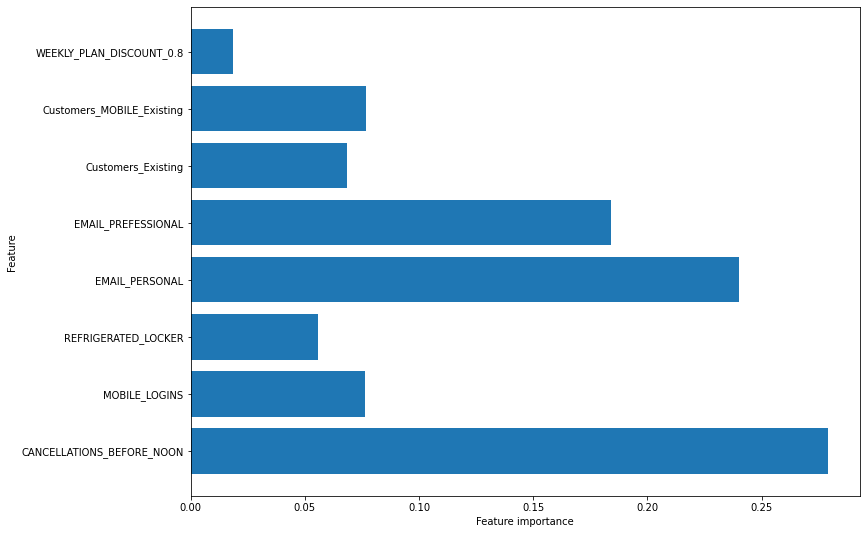

In [44]:
_ = pd.DataFrame(X_train,columns=data_columns_1)
# plotting feature importance
plot_feature_importances(rfc,_)